### Implementing Convolution Layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# img = cv2.imread('ganesha.jpg') # cv2 reads image as BGR format 
# img_ = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# plt.imshow(img_)
# plt.show()

In [3]:
def drawImg(img,title='Image'):
    plt.style.use('seaborn')
    plt.imshow(img,cmap='gray')
    t = title + str(img.shape)
    plt.title(t)
    plt.axis('off')
    plt.show()

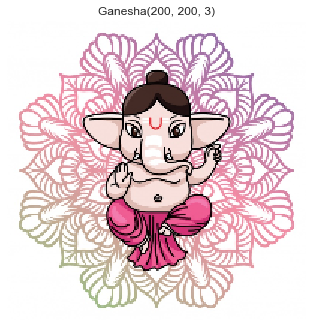

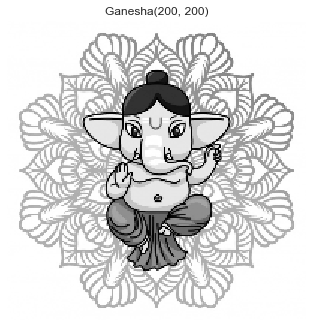

In [4]:
img = cv2.imread('ganesha.jpg') # cv2 reads image as BGR format 
img = cv2.resize(img,(200,200))
img_ = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
drawImg(img_,"Ganesha")
drawImg(img_gray,"Ganesha")


In order to keep things simple we will work with gray_scale image ie 2-D image

In [5]:
def convolution(img,img_filter): 
    """ image.shape -> (W,H) , img_filter.shape -> (F,F)"""
    
    W = img.shape[0]
    H = img.shape[0]
    
    F = img_filter.shape[0]
    
    output_image = np.zeros((W-F+1,H-F+1))

    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    output_image[row][col] += img_filter[i][j]*img[row + i][col + j]
                    
            if output_image[row][col] > 255:
                output_image[row][col] = 255
            elif output_image[row][col] < 0:
                output_image[row][col] = 0
    
    return output_image

In [6]:
#  This edge filter finds edge
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])
output_img =  convolution(img_gray,edge_filter)

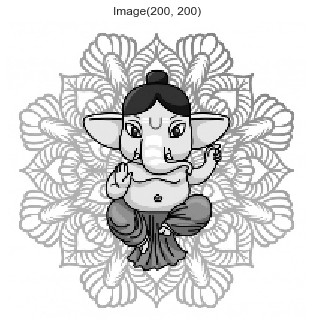

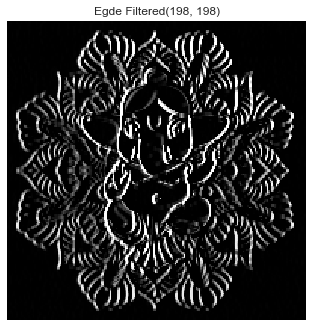

In [8]:
drawImg(img_gray)
drawImg(output_img,title="Egde Filtered")

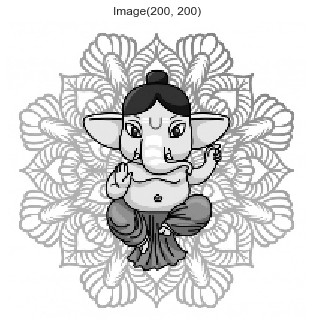

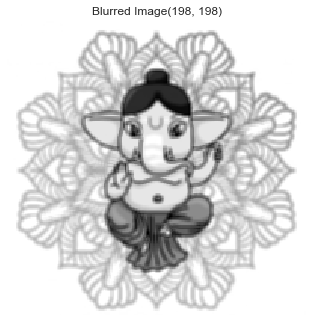

In [9]:
# This is blur filter- it does the average over the 3x3 part
blur_filter = np.ones((3,3))/9.0
# blur_filter2 = np.ones((3,3))

out_image2 = convolution(img_gray,blur_filter)
# out_image3= convolution(img_gray,blur_filter2)

drawImg(img_gray)
drawImg(out_image2,title="Blurred Image")
# drawImg(out_image3)

### Padding- 
- We do padding to make the shape of output image same as that of input image bcoz after passing
    through convolution the size becomes smaller

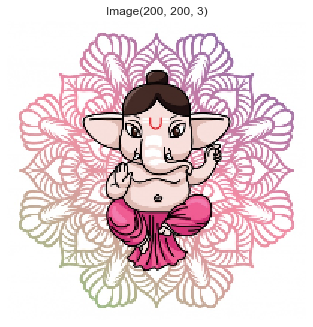

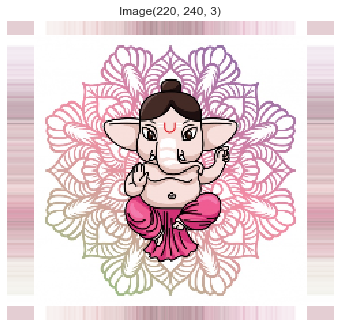

In [10]:
drawImg(img_)
# ((10,10),(20,20),(0,0)) --> 
# (10,10) ->> 10 rows are added both sides
# (20,20) ->> 20 cols are added to both sides
# (0,0) ->> channels are added.
pad_img = np.pad(img_,((10,10),(20,20),(0,0)),'mean')
drawImg(pad_img)

### Implementing Pooling operation

In [12]:
X = np.asarray([[1,0,2,3],
               [4,6,6,8],
               [3,1,1,0],
               [1,2,2,4]])

def pooling(X,mode='max'):
    stride = 2
    f = 2
    
    H,W = X.shape
    
    HO = int((H-f)/stride) +1
    WO = int((W-f)/stride) +1
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_ = X[r_start:r_end,c_start:c_end]
            
            if mode=='max':
                output[r][c] = np.max(X_)
            else:
                output[r][c] = np.mean(X_)
                
    return output
    

In [13]:
op1 = pooling(X)
op2 = pooling(X,mode='average')

In [14]:
print(op1)
print(op2)

[[6. 8.]
 [3. 4.]]
[[2.75 4.75]
 [1.75 1.75]]
